# Titanic Survival Prediction 
### We are going to predict who is going to survive, based on the Titanic dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
ls 

 Volume in drive C has no label.
 Volume Serial Number is 5074-7CFC

 Directory of C:\Users\Ahmet\Desktop\AI General\Projects\P1-P5 Titanic

24.07.2022  11:08    <DIR>          .
24.07.2022  11:08    <DIR>          ..
24.07.2022  10:36    <DIR>          .ipynb_checkpoints
24.07.2022  11:08            61.056 Titanic.ipynb
24.07.2022  10:31            28.629 ttest.csv
24.07.2022  10:31            61.194 ttrain.csv
               3 File(s)        150.879 bytes
               3 Dir(s)  85.327.212.544 bytes free


# file reading and merging

In [3]:
df1=pd.read_csv('ttrain.csv')

In [4]:
df2=pd.read_csv('ttest.csv')

In [5]:
df=df1.append(df2)#Merges ttrain.csv and ttest.csv as df

# Exploratory Data Analysis(EDA)
### Data understanding

In [7]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df.shape,df1.shape,df2.shape

((1309, 12), (891, 12), (418, 11))

In [9]:
df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
593,594,0.0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q
317,318,0.0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S
747,748,1.0,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S
401,1293,NaN,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,NaN,S
191,192,0.0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
557,558,0.0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S
844,845,0.0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S
292,1184,NaN,3,"Nasr, Mr. Mustafa",male,NaN,0,0,2652,7.2292,NaN,C


In [10]:
df.info()#object data check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
df.isnull().sum()#null data check

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [13]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


# Future Engineering
### Data Preparation

In [14]:
#classify titles
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Jonkheer','Don','Sir','Col','Major','Dr','Capt'],'Mr')

df['Title'].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [15]:
#determining family size
df["FamilySize"] = df["SibSp"] + df["Parch"]+1
df.FamilySize.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [16]:
#classify family size
df['Large']=df['FamilySize']>5
df['Medium']=(df['FamilySize']==4)| (df['FamilySize']==5)
df['Small']=(df['FamilySize']==2) | (df['FamilySize']==3)
df['Single']=df['FamilySize']==1

df[['Large','Small','Single','Medium']]=df[['Large','Small','Single','Medium']].replace(True,1)

In [17]:
#fill in the blanks with the average median
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace=True)
df.groupby("Title")["Age"].transform("median")

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [18]:
 df.Embarked.value_counts()#Gives us the value numbers of the Embarked part in df

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [19]:
df["Embarked"]=df["Embarked"].fillna("S")#fill in the blanks with an S

In [20]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
Title             0
FamilySize        0
Large             0
Medium            0
Small             0
Single            0
dtype: int64

In [21]:
 df.Cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

In [22]:
df['Cabin']=df['Cabin'].fillna('C23 C25 C27')

In [23]:
 df.Fare.value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: Fare, Length: 281, dtype: int64

In [24]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)#fill in the blanks with mean value


In [25]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
FamilySize       0
Large            0
Medium           0
Small            0
Single           0
dtype: int64

In [26]:
df.select_dtypes(exclude='number')#it gives noninteger and float datatypes

,Name,Sex,Ticket,Cabin,Embarked,Title,Large,Medium,Small,Single
0,"Braund, Mr. Owen Harris",male,A/5 21171,C23 C25 C27,S,Mr,False,False,1,False
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs,False,False,1,False
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,C23 C25 C27,S,Miss,False,False,False,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs,False,False,1,False
4,"Allen, Mr. William Henry",male,373450,C23 C25 C27,S,Mr,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...
413,"Spector, Mr. Woolf",male,A.5. 3236,C23 C25 C27,S,Mr,False,False,False,1
414,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C,Mrs,False,False,False,1
415,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,C23 C25 C27,S,Mr,False,False,False,1
416,"Ware, Mr. Frederick",male,359309,C23 C25 C27,S,Mr,False,False,False,1


In [27]:
df=df.drop(columns=['PassengerId','Ticket','Name','Cabin','Embarked'],axis=1)#extracts these sections from the table


In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,Large,Medium,Small,Single
0,0.0,3,male,22.0,1,0,7.2500,Mr,2,False,False,1,False
1,1.0,1,female,38.0,1,0,71.2833,Mrs,2,False,False,1,False
2,1.0,3,female,26.0,0,0,7.9250,Miss,1,False,False,False,1
3,1.0,1,female,35.0,1,0,53.1000,Mrs,2,False,False,1,False
4,0.0,3,male,35.0,0,0,8.0500,Mr,1,False,False,False,1


# Data Visualization

<AxesSubplot:title={'center':'Scatter KURT Plot'}, xlabel='Age', ylabel='Fare'>

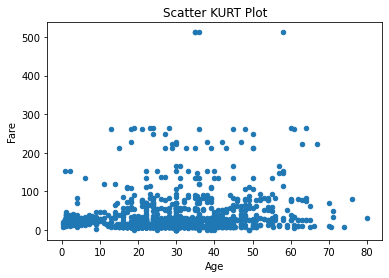

In [28]:
df.plot.scatter(x='Age',y='Fare',title='Scatter KURT Plot')

<AxesSubplot:title={'center':'Line Chart for Ahmet'}>

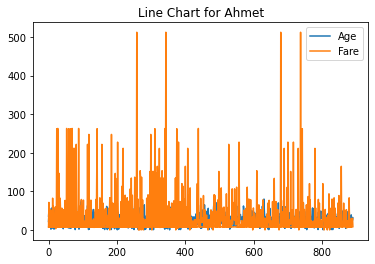

In [29]:
df[['Age','Fare']].plot.line(title='Line Chart for Ahmet')

<AxesSubplot:ylabel='Frequency'>

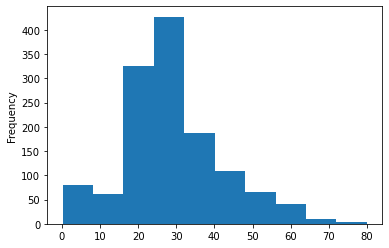

In [30]:
df['Age'].plot.hist()

<AxesSubplot:>

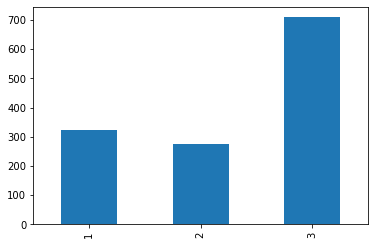

In [34]:
df['Pclass'].value_counts().sort_index().plot.bar()#shortindex sıraya dizilmesini sağlar

<AxesSubplot:>

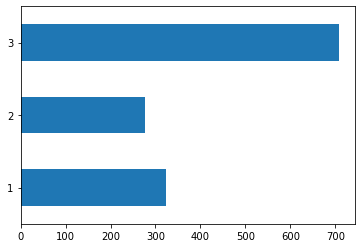

In [37]:
df['Pclass'].value_counts().sort_index().plot.barh()

<AxesSubplot:>

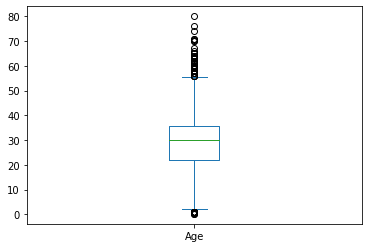

In [38]:
df['Age'].plot.box()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

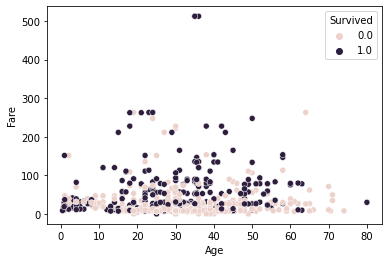

In [39]:
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=df)

<AxesSubplot:>

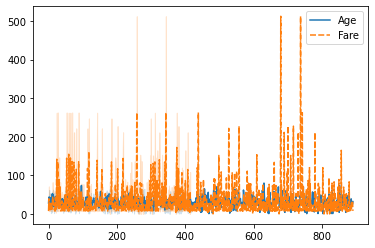

In [40]:
sns.lineplot(data=df[['Age','Fare']])

<AxesSubplot:xlabel='Age', ylabel='Density'>

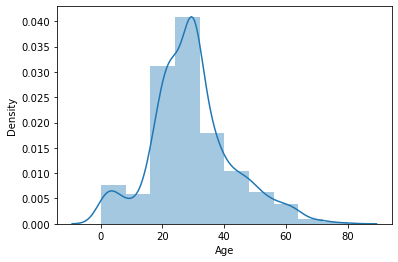

In [41]:
sns.distplot(df['Age'], bins=10,kde=True)#bins 10 tane sütun olusturdu


<AxesSubplot:xlabel='Title', ylabel='count'>

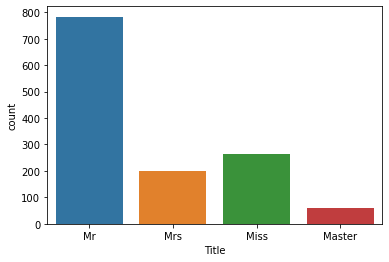

In [43]:
sns.countplot(df['Title'])

<AxesSubplot:xlabel='Age', ylabel='Sex'>

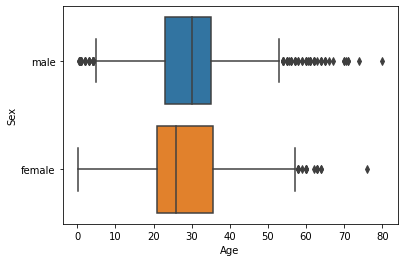

In [44]:
sns.boxplot('Age','Sex',data=df)

<AxesSubplot:>

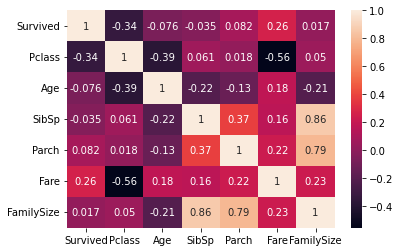

In [45]:
sns.heatmap(df.corr(),annot=True)

In [50]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,Large,Medium,Small,Single
0,0.0,3,male,22.0,1,0,7.2500,Mr,2,False,False,1,False
1,1.0,1,female,38.0,1,0,71.2833,Mrs,2,False,False,1,False
2,1.0,3,female,26.0,0,0,7.9250,Miss,1,False,False,False,1
3,1.0,1,female,35.0,1,0,53.1000,Mrs,2,False,False,1,False
4,0.0,3,male,35.0,0,0,8.0500,Mr,1,False,False,False,1


In [47]:
dumm=pd.get_dummies(df,drop_first=True)


In [48]:
dumm.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Large_1,Medium_1,Small_1,Single_1
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,0,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,1,0,0,1,0
2,1.0,3,26.0,0,0,7.9250,1,0,1,0,0,0,0,0,1
3,1.0,1,35.0,1,0,53.1000,2,0,0,0,1,0,0,1,0
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,0,0,0,1
5,0.0,3,30.0,0,0,8.4583,1,1,0,1,0,0,0,0,1
6,0.0,1,54.0,0,0,51.8625,1,1,0,1,0,0,0,0,1
7,0.0,3,2.0,3,1,21.0750,5,1,0,0,0,0,1,0,0
8,1.0,3,27.0,0,2,11.1333,3,0,0,0,1,0,0,1,0
9,1.0,2,14.0,1,0,30.0708,2,0,0,0,1,0,0,1,0


In [51]:
ttrain=dumm[:891]
ttest=dumm[891:]

In [53]:
ttrain.shape,ttest.shape

((891, 15), (418, 15))

In [62]:
#del ttrain['Survived']

In [55]:
y=df1['Survived']

In [56]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
g=GaussianNB()
from sklearn.naive_bayes import BernoulliNB
b=BernoulliNB()
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.neighbors import KNeighborsRegressor
k=KNeighborsRegressor()

In [63]:
g.fit(ttrain,y)
y_pred=g.predict(ttrain)

In [64]:
confusion_matrix(y,y_pred)


array([[463,  86],
       [ 84, 258]], dtype=int64)

In [65]:
accuracy_score(y,y_pred),precision_score(y,y_pred),recall_score(y,y_pred),f1_score(y,y_pred)


(0.8092031425364759, 0.75, 0.7543859649122807, 0.7521865889212828)

In [66]:

b.fit(ttrain,y)
y_pred=b.predict(ttrain)

In [67]:
confusion_matrix(y,y_pred)


array([[466,  83],
       [ 88, 254]], dtype=int64)

In [68]:
accuracy_score(y,y_pred),precision_score(y,y_pred),recall_score(y,y_pred),f1_score(y,y_pred)


(0.8080808080808081, 0.7537091988130564, 0.7426900584795322, 0.748159057437408)

In [69]:

l.fit(ttrain,y)
y_pred=l.predict(ttrain)

In [70]:
confusion_matrix(y,y_pred)


array([[485,  64],
       [ 90, 252]], dtype=int64)

In [71]:
accuracy_score(y,y_pred),precision_score(y,y_pred),recall_score(y,y_pred),f1_score(y,y_pred)


(0.8271604938271605,
 0.7974683544303798,
 0.7368421052631579,
 0.7659574468085106)

In [72]:

d.fit(ttrain,y)
y_pred=d.predict(ttrain)

In [73]:
accuracy_score(y,y_pred),precision_score(y,y_pred),recall_score(y,y_pred),f1_score(y,y_pred)


(0.9797979797979798, 0.9939024390243902, 0.9532163742690059, 0.973134328358209)

In [74]:

r.fit(ttrain,y)
y_pred=r.predict(ttrain)

In [75]:
confusion_matrix(y,y_pred)


array([[541,   8],
       [ 10, 332]], dtype=int64)

In [76]:
accuracy_score(y,y_pred),precision_score(y,y_pred),recall_score(y,y_pred),f1_score(y,y_pred)


(0.9797979797979798,
 0.9764705882352941,
 0.9707602339181286,
 0.9736070381231672)

In [91]:
results=r.predict(ttrain)


In [93]:
results=results.astype(int)


In [104]:
result=pd.DataFrame({'Survived':results})
result

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [97]:
result.to_csv('TİTANİC.csv',index=False)

In [98]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5074-7CFC

 Directory of C:\Users\Ahmet\Desktop\AI General\Projects\P1-P5 Titanic

24.07.2022  11:57    <DIR>          .
24.07.2022  11:57    <DIR>          ..
24.07.2022  10:36    <DIR>          .ipynb_checkpoints
24.07.2022  11:57             2.683 T˜TAN˜C.csv
24.07.2022  11:56           326.100 Titanic.ipynb
24.07.2022  10:31            28.629 ttest.csv
24.07.2022  10:31            61.194 ttrain.csv
               4 File(s)        418.606 bytes
               3 Dir(s)  85.321.785.344 bytes free


In [103]:
check=pd.read_csv('TİTANİC.csv')
check

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [105]:
check.isnull().sum()

Survived    0
dtype: int64